<a href="https://colab.research.google.com/github/kirtii7/public-sentiment-analysis-based-on-twitter-hashtags/blob/main/Kirti_Chaturvedi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud

Handling the dataset

In [2]:
data = pd.read_csv('dataset.csv')

Building functions

In [3]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

data['Subjectivity']=data['tweetcaption'].apply(getSubjectivity)
data['Polarity']=data['tweetcaption'].apply(getPolarity)
data.head()

,Data,Date,Time,tweetcaption,Subjectivity,Polarity
0,tuesdayvibes,7/14/2020,7:00:21,Love it here vacation vibes amazing beautiful ...,0.534259,0.206296
1,realmeC11,7/14/2020,7:00:21,Best Camera Smartphone under 20k Please vote a...,0.524614,0.128278
2,KPSharmaOli,7/14/2020,7:00:21,shree Why should we have a problem with the pe...,0.725000,-0.037500
3,RheaChakraborty,7/14/2020,7:00:21,Rhea Chakraborty s Heartbreaking Post On Susha...,0.550000,0.100000
4,Stop_Transfer_Sunita_Yadav,7/14/2020,7:00:21,We stand for Sunita Yadav Stop the Transfer Wh...,0.557792,0.174459


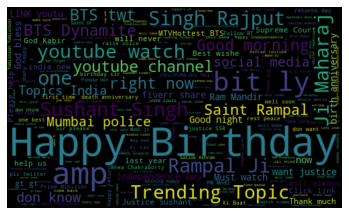

In [4]:
allwords = ' '.join([twts for twts in data['tweetcaption']])
Wordcloud= WordCloud(width=500, height=300, random_state= 21, max_font_size=120).generate(allwords)
plt.imshow(Wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [5]:
def getAnalysis(score):
  if score<0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  else:
    return 'Positive'

data['Analysis']=data['Polarity'].apply(getAnalysis)
data

,Data,Date,Time,tweetcaption,Subjectivity,Polarity,Analysis
0,tuesdayvibes,7/14/2020,7:00:21,Love it here vacation vibes amazing beautiful ...,0.534259,0.206296,Positive
1,realmeC11,7/14/2020,7:00:21,Best Camera Smartphone under 20k Please vote a...,0.524614,0.128278,Positive
2,KPSharmaOli,7/14/2020,7:00:21,shree Why should we have a problem with the pe...,0.725000,-0.037500,Negative
3,RheaChakraborty,7/14/2020,7:00:21,Rhea Chakraborty s Heartbreaking Post On Susha...,0.550000,0.100000,Positive
4,Stop_Transfer_Sunita_Yadav,7/14/2020,7:00:21,We stand for Sunita Yadav Stop the Transfer Wh...,0.557792,0.174459,Positive
...,...,...,...,...,...,...,...
35261,SwaraBhasker,9/14/2020,13:00:01,I ve never seen SwaraBhasker supporting for th...,0.553697,0.087281,Positive
35262,TukdeTukdeGang,9/14/2020,13:00:01,hindu DelhiRiots2020 Best thing has happened a...,0.470394,0.040442,Positive
35263,IndooKiJawani,9/14/2020,13:00:01,The team of IndooKiJawani have a surprise for ...,0.471429,0.264286,Positive
35264,DelhiRiots2020,9/14/2020,13:00:01,The people of India should protest and demand ...,0.386270,0.275714,Positive
